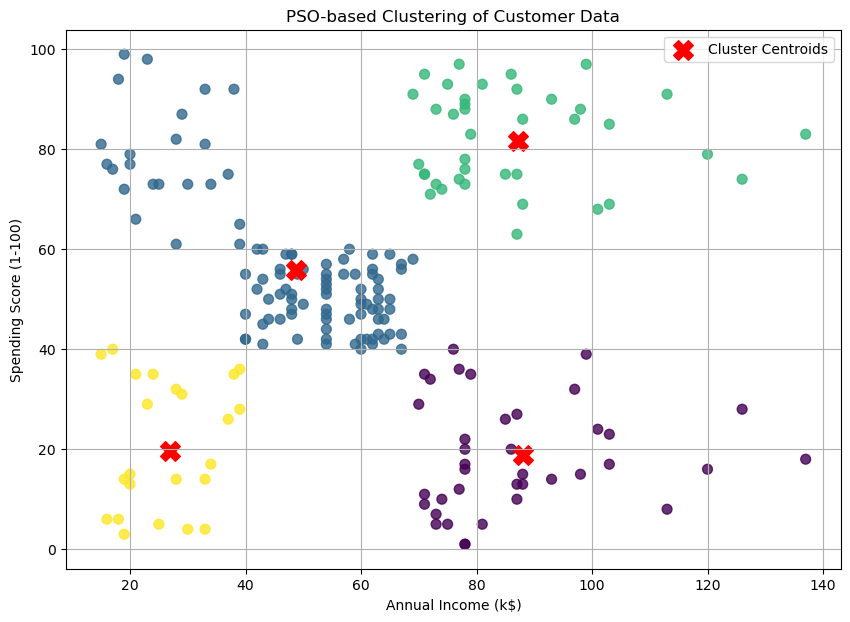

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the synthetic dataset
df = pd.read_csv("SCOA_A7.csv")

# Select features for clustering: Annual Income (k$) and Spending Score (1-100)
customer_data = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# PSO parameters
num_particles = 30
num_iterations = 100
num_clusters = 4 # You might want to adjust this based on the dataset
w = 0.5       # inertia weight
c1 = 1.5      # cognitive coefficient
c2 = 1.5      # social coefficient

# Initialize particles
class Particle:
    def __init__(self, data, num_clusters):
        self.data = data
        self.num_clusters = num_clusters
        # Initialize position as float to avoid UFuncTypeError during update
        self.position = data[np.random.choice(range(len(data)), num_clusters, replace=False)].astype(float)
        self.velocity = np.zeros_like(self.position)
        self.best_position = np.copy(self.position)
        self.best_score = self.evaluate()

    def evaluate(self):
        distances = np.linalg.norm(self.data[:, None] - self.position[None, :], axis=2)
        closest = np.argmin(distances, axis=1)
        score = sum(np.linalg.norm(self.data[i] - self.position[closest[i]])**2 for i in range(len(self.data)))
        return score

    def update(self, global_best):
        r1, r2 = np.random.rand(), np.random.rand()
        cognitive = c1 * r1 * (self.best_position - self.position)
        social = c2 * r2 * (global_best - self.position)
        self.velocity = w * self.velocity + cognitive + social
        self.position += self.velocity
        score = self.evaluate()
        if score < self.best_score:
            self.best_score = score
            self.best_position = np.copy(self.position)

# Initialize swarm
swarm = [Particle(customer_data, num_clusters) for _ in range(num_particles)]
global_best = min(swarm, key=lambda p: p.best_score).best_position

# PSO loop
for _ in range(num_iterations):
    for particle in swarm:
        particle.update(global_best)
    global_best = min(swarm, key=lambda p: p.best_score).best_position

# Final clustering
distances = np.linalg.norm(customer_data[:, None] - global_best[None, :], axis=2)
labels = np.argmin(distances, axis=1)

# Plot results
plt.figure(figsize=(10, 7))
plt.scatter(customer_data[:, 0], customer_data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
plt.scatter(global_best[:, 0], global_best[:, 1], c='red', marker='X', s=200, label='Cluster Centroids')
plt.title("PSO-based Clustering of Customer Data")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
```markdown
### Particle Swarm Optimization (PSO) for Viva Preparation

**1. What is Particle Swarm Optimization (PSO)?**
*   PSO is a population-based, metaheuristic optimization algorithm inspired by the social behavior of bird flocking or fish schooling.
*   It belongs to the class of swarm intelligence algorithms.
*   Developed by James Kennedy and Russell Eberhart in 1995.

**2. How does PSO work?**
*   **Particles:** Each potential solution is a 'particle' in the search space.
*   **Position and Velocity:** Each particle has a current position (representing a solution) and a velocity (determining its movement).
*   **Fitness Function:** An objective function (or fitness function) evaluates the quality of each particle's position.
*   **Personal Best (pBest):** Each particle keeps track of its best position found so far.
*   **Global Best (gBest):** The algorithm keeps track of the best position found by any particle in the entire swarm.
*   **Update Mechanism:** In each iteration, particles update their velocity and position based on:
    *   Their own `pBest` (cognitive component).
    *   The `gBest` of the swarm (social component).
    *   Their previous velocity (inertia).
*   **Equations:**
    *   `v_new = w * v_current + c1 * r1 * (pBest - x_current) + c2 * r2 * (gBest - x_current)`
    *   `x_new = x_current + v_new`
    *   Where `w` is inertia weight, `c1`, `c2` are acceleration coefficients, and `r1`, `r2` are random numbers.

**3. Key Parameters in PSO:**
*   **`num_particles`:** Size of the swarm.
*   **`num_iterations`:** Number of times the swarm updates its positions.
*   **`w` (Inertia Weight):** Balances global (exploration) and local (exploitation) search. A high `w` favors exploration, low `w` favors exploitation.
*   **`c1` (Cognitive Coefficient):** Pulls the particle towards its `pBest`. Influences the particle's tendency to follow its own past successful experiences.
*   **`c2` (Social Coefficient):** Pulls the particle towards the `gBest`. Influences the particle's tendency to follow the swarm's best experience.

**4. Application in Clustering (as seen in the code):**
*   **Problem:** Find optimal cluster centroids for a given dataset.
*   **Particle Representation:** Each particle's position represents a set of `num_clusters` centroids.
*   **Fitness Function (`evaluate` method):** The fitness of a particle (set of centroids) is typically measured by a metric like the sum of squared distances from data points to their assigned cluster centroids (similar to K-Means' objective function). A lower score means better clustering.
*   **Optimization Goal:** Minimize the fitness function to find the centroid configuration that best groups the data.

**5. Advantages of PSO:**
*   Simple to implement.
*   Few parameters to adjust.
*   Often finds good solutions quickly.
*   Less prone to getting stuck in local optima compared to gradient-based methods.
*   Does not require the problem to be differentiable.

**6. Disadvantages of PSO:**
*   Can converge prematurely in some complex, high-dimensional problems.
*   Performance can be sensitive to parameter tuning (`w`, `c1`, `c2`).
*   Might not guarantee finding the global optimum.

**7. Comparison with K-Means (for clustering):**
*   **K-Means:** A deterministic, iterative clustering algorithm that aims to minimize within-cluster variance. Highly dependent on initial centroid placement.
*   **PSO for Clustering:** A stochastic optimization approach to find good centroid placements. Can explore a wider search space and potentially escape poor initializations that might trap K-Means in local optima. PSO is used to *optimize* the centroid selection, rather than being a clustering algorithm itself in the same way K-Means is.

**8. Code Specifics for Viva:**
*   Point out how `customer_data` is used as the dataset for clustering.
*   Explain how `num_clusters` defines the number of centroids each particle represents.
*   Describe the `Particle` class: how `position` stores centroids, `velocity` drives movement, `evaluate` calculates fitness, and `update` adjusts position/velocity based on `pBest` and `gBest`.
*   Explain the main PSO loop: `num_iterations` and how `global_best` is updated.
*   Finally, how `labels` are assigned based on the `global_best` centroids found.
```

In [ ]:
# -------------------------------------------------------------
# IMPORT REQUIRED LIBRARIES
# -------------------------------------------------------------
# numpy  → used for mathematical operations and arrays
# matplotlib → used for plotting graphs
# pandas → used for loading and handling datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------------------------------------------
# LOAD THE DATASET
# -------------------------------------------------------------
# Reading the CSV file into a pandas DataFrame.
# This dataset contains two important features for clustering:
# Annual Income and Spending Score.
df = pd.read_csv("SCOA_A7.csv")

# Extracting only the two features required for clustering.
# .values converts the selected columns into a NumPy array.
customer_data = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# -------------------------------------------------------------
# PSO (PARTICLE SWARM OPTIMIZATION) PARAMETERS
# -------------------------------------------------------------
# num_particles → total number of particles (candidate solutions)
# num_iterations → how many times swarm updates
# num_clusters → how many clusters we want (similar to k in KMeans)
# w → inertia weight (controls effect of previous velocity)
# c1 → cognitive coefficient (particle moves toward its own best)
# c2 → social coefficient (particle moves toward global best)
num_particles = 30
num_iterations = 100
num_clusters = 4
w = 0.5
c1 = 1.5
c2 = 1.5

# -------------------------------------------------------------
# DEFINE PARTICLE CLASS
# -------------------------------------------------------------
# Each particle represents one set of cluster centroids.
# Particle tries to find centroids that minimize sum of squared distances.
class Particle:
    def __init__(self, data, num_clusters):
        self.data = data
        self.num_clusters = num_clusters
        
        # Initial centroid positions are randomly chosen from actual data points.
        # astype(float) → ensures mathematical operations work properly.
        self.position = data[np.random.choice(range(len(data)), num_clusters, replace=False)].astype(float)
        
        # Initial velocity of particle is zero.
        self.velocity = np.zeros_like(self.position)
        
        # Store personal best position and score.
        self.best_position = np.copy(self.position)
        self.best_score = self.evaluate()

    # ---------------------------------------------------------
    # FITNESS FUNCTION
    # ---------------------------------------------------------
    # Computes the total sum of squared distances between 
    # each data point and its nearest centroid.
    # Lower score means better clustering.
    def evaluate(self):
        distances = np.linalg.norm(self.data[:, None] - self.position[None, :], axis=2)
        
        # Find nearest centroid for each data point.
        closest = np.argmin(distances, axis=1)
        
        # Calculate SSE (Sum of Squared Errors)
        score = sum(np.linalg.norm(self.data[i] - self.position[closest[i]])**2
                    for i in range(len(self.data)))
        return score

    # ---------------------------------------------------------
    # UPDATE PARTICLE POSITION AND VELOCITY
    # ---------------------------------------------------------
    # Particle updates its velocity based on:
    # → its own best (cognitive term)
    # → global best (social term)
    # → previous velocity (inertia)
    def update(self, global_best):
        r1, r2 = np.random.rand(), np.random.rand()
        
        cognitive = c1 * r1 * (self.best_position - self.position)
        social = c2 * r2 * (global_best - self.position)
        
        # Update velocity
        self.velocity = w * self.velocity + cognitive + social
        
        # Update position (centroid locations)
        self.position += self.velocity
        
        # Recalculate score and update personal best if improved
        score = self.evaluate()
        if score < self.best_score:
            self.best_score = score
            self.best_position = np.copy(self.position)

# -------------------------------------------------------------
# INITIALIZE SWARM (GROUP OF PARTICLES)
# -------------------------------------------------------------
swarm = [Particle(customer_data, num_clusters) for _ in range(num_particles)]

# Find the best particle among all (global best)
global_best = min(swarm, key=lambda p: p.best_score).best_position

# -------------------------------------------------------------
# PSO MAIN LOOP
# -------------------------------------------------------------
# For a fixed number of iterations, update particles and re-evaluate global best.
for _ in range(num_iterations):
    for particle in swarm:
        particle.update(global_best)
    
    # Update global best after each iteration
    global_best = min(swarm, key=lambda p: p.best_score).best_position

# -------------------------------------------------------------
# FINAL CLUSTER ASSIGNMENT
# -------------------------------------------------------------
# Assign each data point to the nearest centroid from global_best.
distances = np.linalg.norm(customer_data[:, None] - global_best[None, :], axis=2)
labels = np.argmin(distances, axis=1)

# -------------------------------------------------------------
# PLOT THE FINAL CLUSTERS
# -------------------------------------------------------------
# Scatter plot of customers with different colors representing clusters.
# Red 'X' marks represent final PSO-based centroid positions.
plt.figure(figsize=(10, 7))
plt.scatter(customer_data[:, 0], customer_data[:, 1], c=labels,
            cmap='viridis', s=50, alpha=0.8)

plt.scatter(global_best[:, 0], global_best[:, 1],
            c='red', marker='X', s=200, label='Cluster Centroids')

plt.title("PSO-based Clustering of Customer Data")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)
plt.show()


o/p interpretation

Cluster meanings (explain this clearly in viva):

Low Income – Low Spending
Customers who earn less and spend less. Likely budget shoppers.

Medium Income – Medium Spending
Average regular customers with typical purchasing behaviour.

High Income – Low Spending
Customers who can afford more but don’t spend much — good target for promotions.

High Income – High Spending
Premium, loyal customers — most valuable segment.

Red X Marks = PSO-Optimized Centroids

These represent the "center" of each cluster. PSO has positioned them such that the overall cluster error (distance from points to centroids) is minimized.

Why PSO works well here

Unlike K-Means, PSO explores multiple centroid possibilities at once.

It avoids poor local minima and finds better centroid locations.

Especially useful when data is not perfectly spherical.